In [38]:
# Evaluate using Cross Validation
from pandas import read_csv
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools


In [39]:
#load the data
filename ="E:/rt/reusablecodes/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
#convert into numpy array. you can also try with out convertion as we done in previous examples
array = dataframe.values
#input features
X = array[:,0:8]
#output features
Y = array[:,8]



In [41]:
#devide data into 10 folds
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds,random_state=seed)

model = DecisionTreeClassifier()



In [4]:
###################another aproach but not useful practically#####################
#take anymodel
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold,n_jobs=-1)

print "results: ",results
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)


results:  [ 0.63636364  0.77922078  0.68831169  0.57142857  0.7012987   0.74025974
  0.72727273  0.77922078  0.63157895  0.69736842]
Accuracy: 69.523% (6.332%)


In [5]:
###########this method is useful practically##########################

#set tuning paramenters in dictionary 
parameters={ "min_samples_split":[2,3],"criterion":["gini","entropy"]}


scoring='accuracy'
#for Classification below is the list:
# you can also try scoring = 'neg_log_loss'
#you can also try scoring = 'roc_auc'
#you can also try scoring='accuracy'

#for regression below is the list:
#scoring = 'neg_mean_absolute_error'
#scoring = 'neg_mean_squared_error'
#scoring = 'r2'

#n_jobs=-1 makes the parallism if your OS supports
#cv=kfold says use k fold technique to estimate  
clf = GridSearchCV(estimator=model,param_grid=parameters,scoring=scoring,cv=kfold,n_jobs=-1)
clf.fit(X,Y)

print clf.best_estimator_
print clf.best_score_
print clf.best_params_


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-9.75900322617
{'min_samples_split': 2, 'criterion': 'entropy'}


In [6]:
#get the best model selected by GridSearchCV as final model
bestmodel=clf.best_estimator_



In [10]:
#Use this for future predictions
bestmodel.predict(X[1])


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])

In [14]:
# see how it is prediting on training data
results_train=pd.DataFrame()
results_train["pred"]=bestmodel.predict(X)
results_train["actual"]=Y


In [15]:
results_train.head()

,pred,actual
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


In [42]:
#X-axis- prediction 
#Y-axis-actual
#Confusion matrix
cnf_matrix= confusion_matrix(results_train["actual"],results_train["pred"])
print cnf_matrix

[[500   0]
 [  0 268]]


In [43]:
#classification report
report = classification_report(results_train["actual"], results_train["pred"]) 
print report

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       768



In [22]:
report = classification_report([1,0],[1,1]) 
print report

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.50      1.00      0.67         1

avg / total       0.25      0.50      0.33         2



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[500   0]
 [  0 268]]


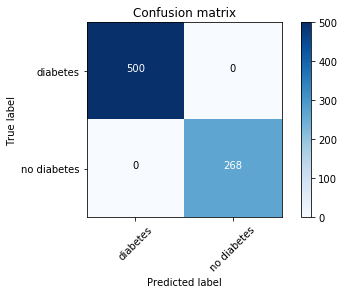

In [37]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["diabetes","no diabetes"])
plt.show()

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
